# Kobe Bryant Shot Selection
### Abayomi Koyejo (Petroleum), Arnur Karbozov (Energy System)


![alt text](kg.jpg "")

## Description

Dataset contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. 

Our task is to tell which shot kobe will sink given a set of inputs.

Using ML we can make such prediction based on available data and knowledge of this will change the rules of the games  - coaching tactics, defense and offense tactics (knowledge of 'sure zones'). Also a good way of analysing player's performance, We can also compare best probable performance using the model and the real life actual player performance etc

This is very actual for this game basketball which is the 2nd most popular game in the US and a huge market with rising interest in sport analytics.

Sports analytics market size at 764.3 million USD in 2016 is anticipated to reach 15.5 billion USD by 2023

80% BB Teams in the US are already into sport analytics so it is a ready market. Betting clubs also actively use it.


In general: player performance enhancement --> team enhancement --> more wins for team --> more title for club --> more money for everyone!

## Load Data

In [45]:
## Initiate Analysis by loading dataset and spliting

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib
from matplotlib import pyplot as plt
from sklearn import preprocessing

import warnings
warnings.simplefilter('ignore')

In [46]:
data = pd.read_csv('data.csv')

In [47]:
#split 
test = data[pd.isnull(data['shot_made_flag'])] 
data.dropna(axis=0, how='any',inplace=True)
y = data['shot_made_flag']

## Prepare Dataset

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 25 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
lat                   25697 non-null float64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
lon                   25697 non-null float64
minutes_remaining     25697 non-null int64
period                25697 non-null int64
playoffs              25697 non-null int64
season                25697 non-null object
seconds_remaining     25697 non-null int64
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name         

In [49]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


In [50]:
data.drop('team_id', axis=1, inplace=True) # same number
data.drop('team_name', axis=1, inplace=True) # Always LA Lakers
data.drop('shot_id', axis=1, inplace=True) # same number
data.drop('game_id', axis=1, inplace=True) # just some number with no effect to ds, like id
data.drop('game_event_id', axis=1, inplace=True) # sth like id


In [51]:
data['time_remaining'] = data['minutes_remaining'] * 60 + data['seconds_remaining']
#combine minutes and seconds into time in seconds

In [52]:
data.drop(['minutes_remaining', 'seconds_remaining', 'matchup'], axis=1, inplace=True) # converted

In [53]:
data.head(10)

,action_type,combined_shot_type,lat,loc_x,loc_y,lon,period,playoffs,season,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,opponent,time_remaining
1,Jump Shot,Jump Shot,34.0443,-157,0,-118.4268,1,0,2000-01,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,POR,622
2,Jump Shot,Jump Shot,33.9093,-101,135,-118.3708,1,0,2000-01,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,POR,465
3,Jump Shot,Jump Shot,33.8693,138,175,-118.1318,1,0,2000-01,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,POR,412
4,Driving Dunk Shot,Dunk,34.0443,0,0,-118.2698,2,0,2000-01,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,POR,379
5,Jump Shot,Jump Shot,34.0553,-145,-11,-118.4148,3,0,2000-01,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,POR,572
6,Layup Shot,Layup,34.0443,0,0,-118.2698,3,0,2000-01,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,POR,532
8,Jump Shot,Jump Shot,33.9363,-65,108,-118.3348,3,0,2000-01,12,1.0,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,2000-10-31,POR,372
9,Running Jump Shot,Jump Shot,33.9193,-33,125,-118.3028,3,0,2000-01,12,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,2000-10-31,POR,216
10,Jump Shot,Jump Shot,33.8063,-94,238,-118.3638,3,0,2000-01,25,0.0,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,2000-10-31,POR,116
11,Jump Shot,Jump Shot,33.9173,121,127,-118.1488,1,0,2000-01,17,1.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-11-01,UTA,660


## Exploratory Analysis

#### 1. Combined Shot Type

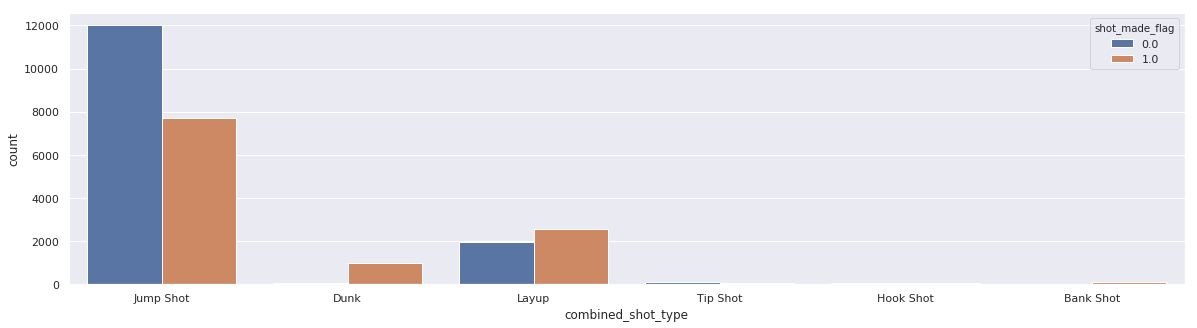

In [54]:
plt.figure(figsize=(20,5));
sns.countplot(x='combined_shot_type', hue='shot_made_flag', data=data)
#we see the various count of shots sorted by target column

Text(0.5, 1.0, 'Combined shot against shot accuracy')

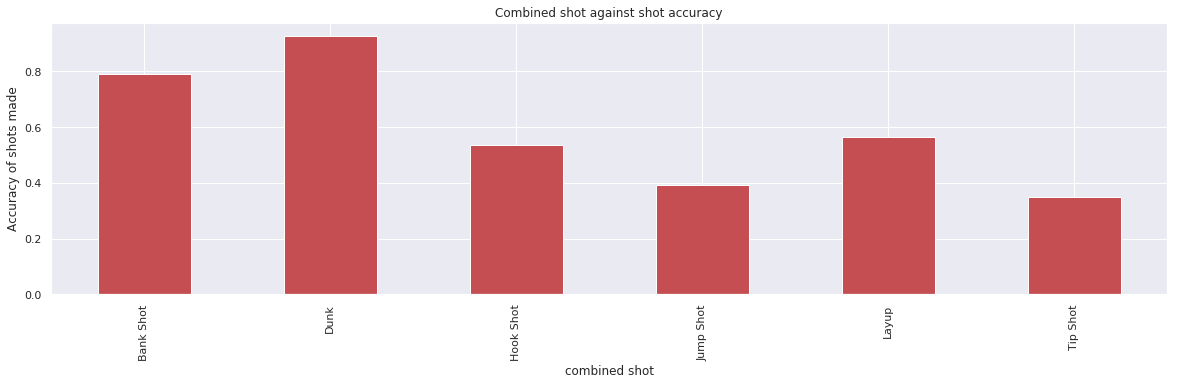

In [55]:
#What of the real accuracy of each shot type?
combined_shot = data.groupby('combined_shot_type')['shot_made_flag'].mean()
combined_shot.plot(kind ='bar', color="r", grid = True, figsize = (20, 5))
plt.xlabel("combined shot")
plt.ylabel("Accuracy of shots made")
plt.title("Combined shot against shot accuracy")
#we see Dunk shot as the highest value here and others reducing in accuracy. 


#### 2. Moving to the next columns on the right we have lat and lon and loc_x and loc_y


Text(0.5, 1.0, 'loc_x vs loc_y')

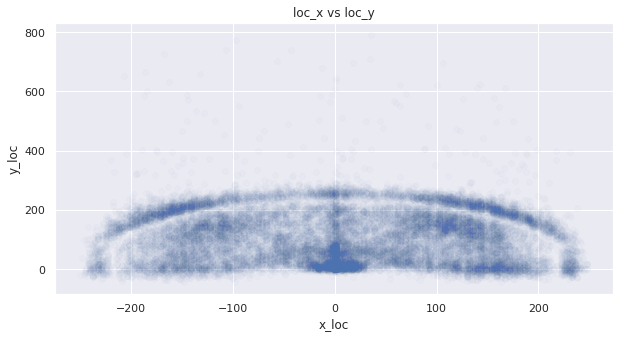

In [56]:
plt.figure(figsize=(10,5))
plt.scatter(data.loc_x, data.loc_y, color='b', alpha=0.02)
plt.xlabel("x_loc")
plt.ylabel("y_loc")
plt.title("loc_x vs loc_y")

Text(0.5, 1.0, 'lon vs lat')

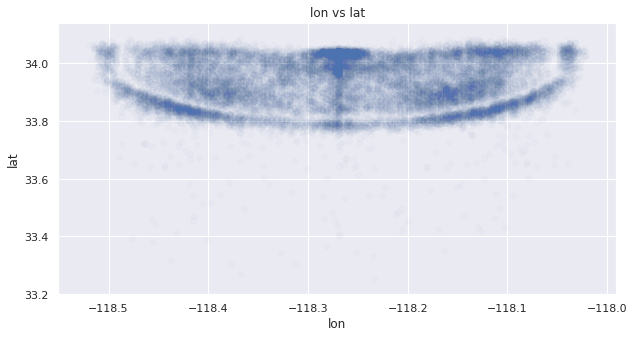

In [57]:
plt.figure(figsize=(10,5))
plt.scatter(data.lon, data.lat, color='b', alpha=0.02)
plt.xlabel("lon")
plt.ylabel("lat")
plt.title("lon vs lat")

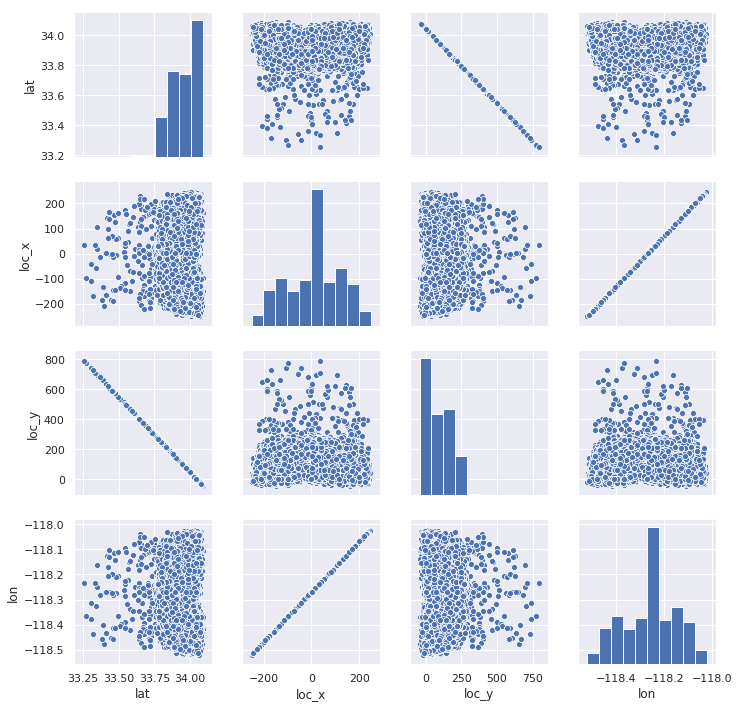

In [58]:
cols = ['lat','loc_x', 'loc_y', 'lon']
sns_plot = sns.pairplot(data[cols])

In [59]:
#basically the same thing is represented by the  (loc_x,loc_y)  and (lon,lat) set so we will drop one and move one
data.drop(['lat', 'lon'], axis=1, inplace=True)

#### 3. Period of play


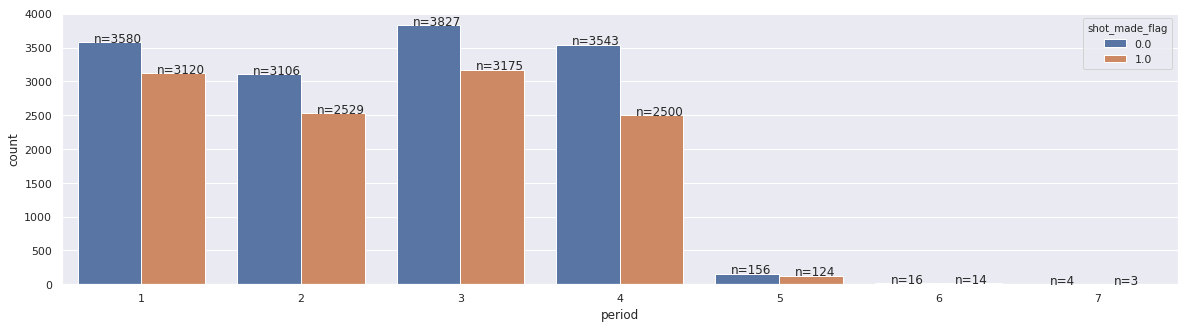

In [60]:
plt.figure(figsize=(20,5));
ax=sns.countplot(x='period', hue='shot_made_flag', data=data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.10, height+ 3, 'n=%.0f'%(height))
#some period features more shots than others. Let's check how they compare in accuracy

Text(0.5, 1.0, 'period against shot accuracy')

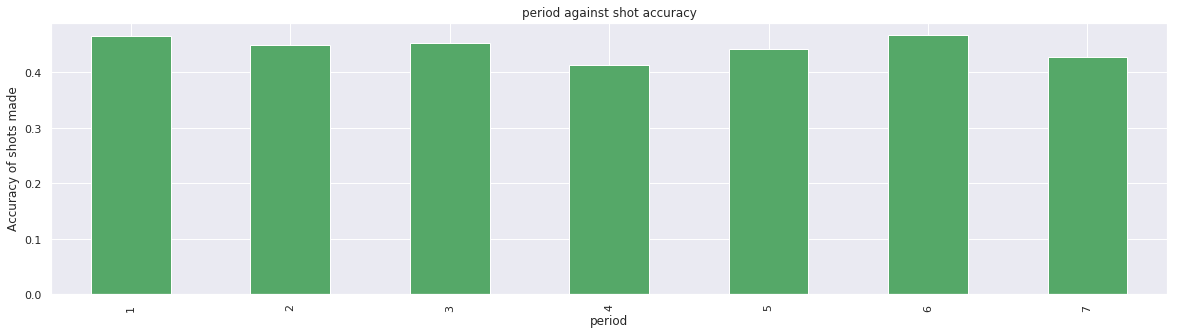

In [61]:
period = data.groupby('period')['shot_made_flag'].mean()
period.plot(kind ='bar', color="g", grid = True, figsize = (20, 5))
plt.xlabel("period")
plt.ylabel("Accuracy of shots made")
plt.title("period against shot accuracy")

#In general the accuracy is always above 40 percent and deviation not that large amongst them

#### 4. Season


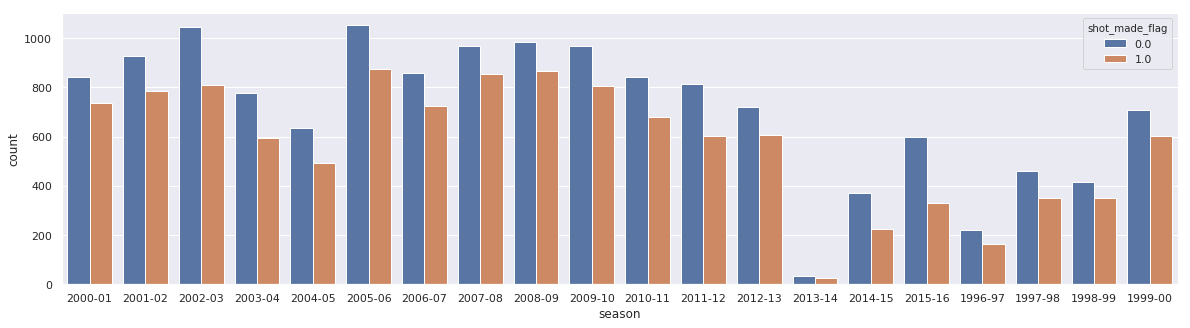

In [62]:
plt.figure(figsize=(20,5));
sns.countplot( x='season', hue='shot_made_flag', data=data)
#What happened in the 2013-2014 season? 
#According to news reports - an injury to the foot!

Text(0.5, 1.0, 'season against shot accuracy')

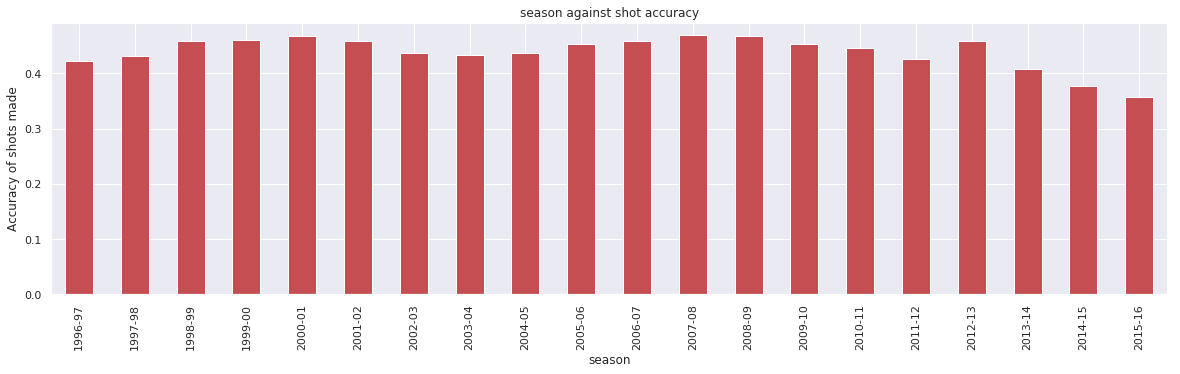

In [63]:
season = data.groupby('season')['shot_made_flag'].mean()
season.plot(kind ='bar', color="r", grid = True, figsize = (20, 5))
plt.xlabel("season")
plt.ylabel("Accuracy of shots made")
plt.title("season against shot accuracy")
#In general we see a decline in accuracy and performance as the player ages 

#### 5. Shot Distance, Shot Type, Shot Zone Area, Shot Zone Basic, Shot Zone Range

Text(0.5, 1.0, 'shot distance against shot accuracy')

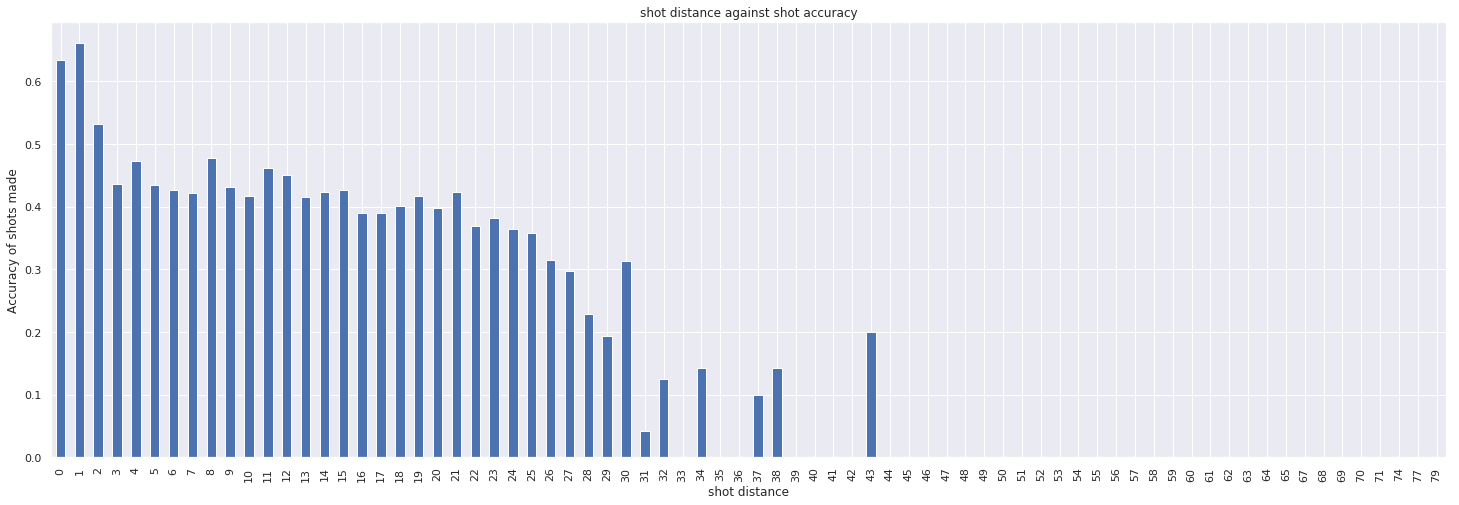

In [64]:
shot_distance = data.groupby('shot_distance')['shot_made_flag'].mean()
shot_distance.plot(kind ='bar', color="b", grid = True, figsize = (25, 8))
plt.xlabel("shot distance")
plt.ylabel("Accuracy of shots made")
plt.title("shot distance against shot accuracy")
#In general we see a decline in accuracy and performance as shot distance increases

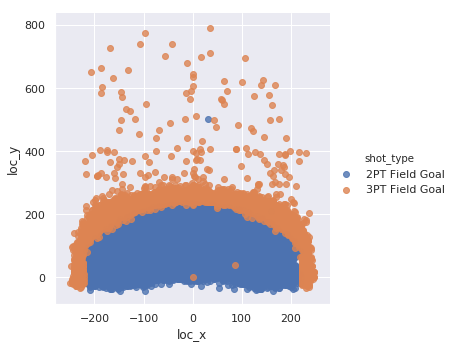

In [65]:
sns.lmplot('loc_x','loc_y',data=data,hue='shot_type',fit_reg = False)
#hot_type

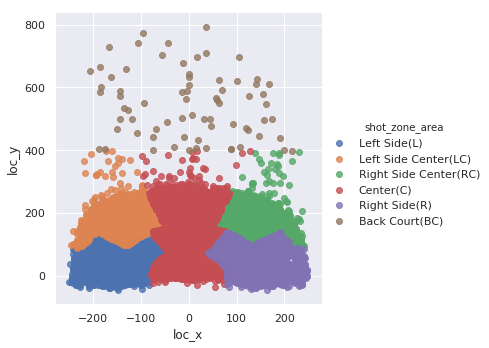

In [66]:
sns.lmplot('loc_x','loc_y',data=data,hue='shot_zone_area',fit_reg = False)
#shot zone area

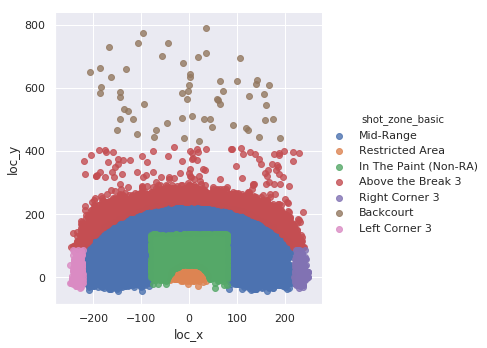

In [67]:
sns.lmplot('loc_x','loc_y',data=data,hue='shot_zone_basic',fit_reg = False)


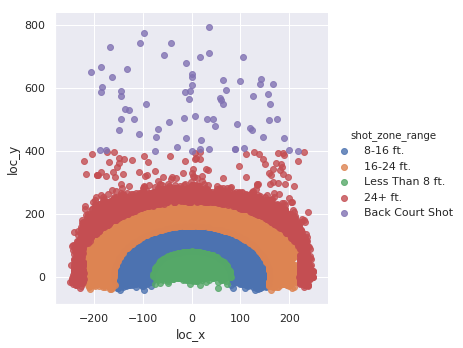

In [68]:
sns.lmplot('loc_x','loc_y',data=data,hue='shot_zone_range',fit_reg = False)

In [69]:
#This will help us in encoding this categorical vale to numeric since it is an ordinal categorical value
#The closer the range the better the chances
data['shot_zone_range'] = data.shot_zone_range.map({'Less Than 8 ft.':3, "8-16 ft.":2, '16-24 ft.':1, '24+ ft.':0})
data['shot_type'] = data.shot_type.map({'2PT Field Goal':1, "3PT Field Goal":0})

#### 6 Action type

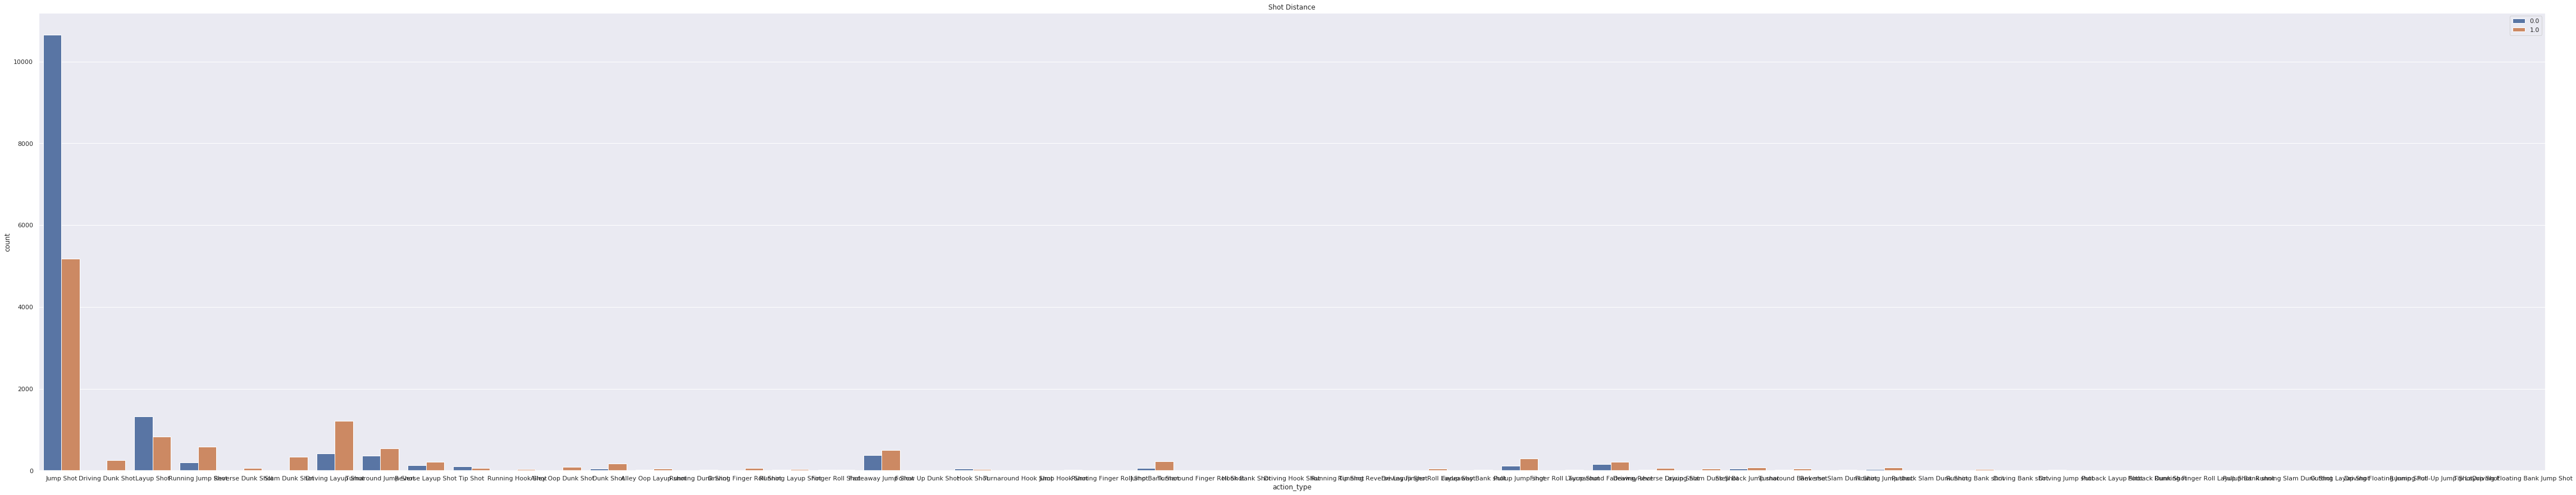

In [70]:
plt.figure(figsize=(80,15));
sns.countplot(x='action_type', hue='shot_made_flag', data=data)
plt.title('Shot Distance')
plt.legend(loc=1)

In [71]:
#too many actions and low values for the. we combine the lowest 50 in others
other_types = data['action_type'].value_counts().sort_values().index.values[:50]
data.loc[data['action_type'].isin(other_types), 'action_type'] = 'others'

In [72]:
data['action_type'].unique()

array(['Jump Shot', 'others', 'Layup Shot', 'Driving Layup Shot',
       'Turnaround Jump Shot', 'Fadeaway Jump Shot'], dtype=object)

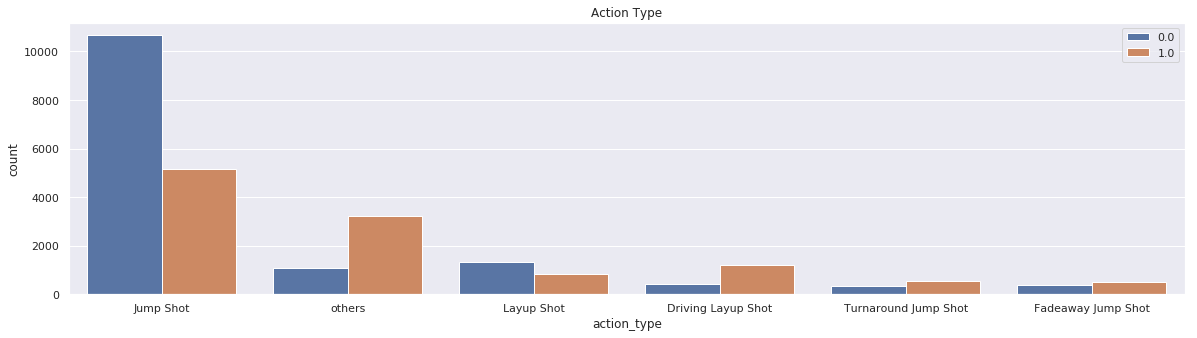

In [73]:
plt.figure(figsize=(20,5));
sns.countplot(x='action_type', hue='shot_made_flag', data=data)
plt.title('Action Type')
plt.legend(loc=1)

Text(0.5, 1.0, 'Action type against shot accuracy')

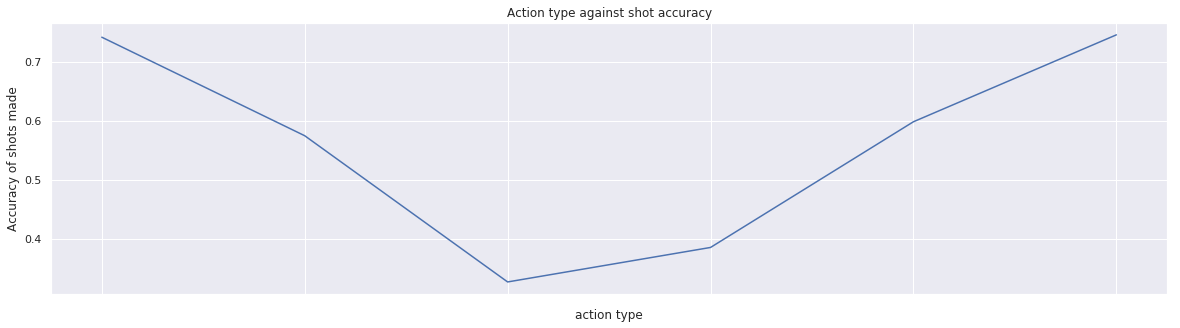

In [74]:
action_type = data.groupby('action_type')['shot_made_flag'].mean()
action_type.plot(kind ='line', color="b", grid = True, figsize = (20, 5))
plt.xlabel("action type")
plt.ylabel("Accuracy of shots made")
plt.title("Action type against shot accuracy")

#### 7 Game date

In [75]:
#convert to separate column - year, month, day
data['game_date']=pd.to_datetime(data['game_date'])
data['year']=data['game_date'].dt.year
data['month']=data['game_date'].dt.month
data['day']=data['game_date'].dt.day

In [76]:
data.head()

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,opponent,time_remaining,year,month,day
1,Jump Shot,Jump Shot,-157,0,1,0,2000-01,15,0.0,1,Left Side(L),Mid-Range,2.0,2000-10-31,POR,622,2000,10,31
2,Jump Shot,Jump Shot,-101,135,1,0,2000-01,16,1.0,1,Left Side Center(LC),Mid-Range,1.0,2000-10-31,POR,465,2000,10,31
3,Jump Shot,Jump Shot,138,175,1,0,2000-01,22,0.0,1,Right Side Center(RC),Mid-Range,1.0,2000-10-31,POR,412,2000,10,31
4,others,Dunk,0,0,2,0,2000-01,0,1.0,1,Center(C),Restricted Area,3.0,2000-10-31,POR,379,2000,10,31
5,Jump Shot,Jump Shot,-145,-11,3,0,2000-01,14,0.0,1,Left Side(L),Mid-Range,2.0,2000-10-31,POR,572,2000,10,31


In [77]:
data.drop(['shot_zone_basic', 'season', 'game_date'], axis=1, inplace=True)

In [78]:
data.head()

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_range,opponent,time_remaining,year,month,day
1,Jump Shot,Jump Shot,-157,0,1,0,15,0.0,1,Left Side(L),2.0,POR,622,2000,10,31
2,Jump Shot,Jump Shot,-101,135,1,0,16,1.0,1,Left Side Center(LC),1.0,POR,465,2000,10,31
3,Jump Shot,Jump Shot,138,175,1,0,22,0.0,1,Right Side Center(RC),1.0,POR,412,2000,10,31
4,others,Dunk,0,0,2,0,0,1.0,1,Center(C),3.0,POR,379,2000,10,31
5,Jump Shot,Jump Shot,-145,-11,3,0,14,0.0,1,Left Side(L),2.0,POR,572,2000,10,31


In [79]:
data = pd.get_dummies(data, columns=['action_type', 'combined_shot_type', 'shot_zone_area', "opponent"], drop_first=True)

##  Cross-Validation

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [81]:
X = data
X.drop('shot_made_flag', axis=1, inplace=True)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)

In [82]:
state=42
kfold = KFold(n_splits=5, shuffle=True, random_state=state)
cv = kfold.split(X,y)

clf = LogisticRegression()
scores = cross_val_score(clf, X, y, scoring='roc_auc', cv=cv)
print('KFold score for Logistic Regression: {0:.3f}  ± {1:.3f}'.format(scores.mean(), scores.std()))


KFold score for Logistic Regression: 0.690  ± 0.006


In [83]:
kfold = KFold(n_splits=5, shuffle=True, random_state=state)
cv = kfold.split(X,y)

clf1 = RandomForestClassifier(random_state=state)
scores = cross_val_score(clf1, X, y, scoring='roc_auc', cv=cv)
print('KFold score for Random Forest: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()))

KFold score for Random Forest: 0.662 ± 0.006


In [84]:
kfold = KFold(n_splits=5, shuffle=True, random_state = state)
cv = kfold.split(X,y)

clf2 = GradientBoostingClassifier()
scores = cross_val_score(clf2, X, y, scoring='roc_auc', cv=cv)
print('KFold score for Gradient Boosting: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()))

KFold score for Gradient Boosting: 0.704 ± 0.006


In [85]:
kfold = KFold(n_splits=5, shuffle=True, random_state=state)
cv = kfold.split(X,y)

clf3 = KNeighborsClassifier()
scores = cross_val_score(clf3, X, y, scoring='roc_auc', cv=cv)
print('KFold score for KNeighborsClassifier: {0:.3f}  ± {1:.3f}'.format(scores.mean(), scores.std()))

KFold score for KNeighborsClassifier: 0.553  ± 0.004


## Hyperparameter tuning

In [42]:
from scipy.stats import uniform

logistic = LogisticRegression()
penalty = ['l1', 'l2']
# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(logistic, hyperparameters, random_state=42, n_iter=100, cv=5, verbose=0, scoring='roc_auc', n_jobs=-1)

#Conduct Random Search
# Fit randomized search
best_model = clf.fit(X, y)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 0.38164046596164525


In [43]:
print(best_model.best_score_)

0.6847593689226947


In [44]:
#KNN
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

estimator = Pipeline([('min_max_scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

param_grid = {
        'knn__n_neighbors': [3, 5, 10, 20],
        'knn__algorithm': ['ball_tree'],
        'knn__leaf_size': [2, 3, 4],
            }
    
knn_grid = RandomizedSearchCV(estimator, param_grid, random_state=42, cv=5, scoring='roc_auc', n_jobs=-1)
    
knn_grid.fit(X, y)

print(knn_grid.best_score_)
print(knn_grid.best_params_)

KeyboardInterrupt: 

In [ ]:
#Random Forest
param_grid ={
        'n_estimators': [10, 50, 100, 1000],
        'max_features': [3, 5, 10],
        'max_depth': [25, 50, 80],
        'bootstrap': [True],
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [5, 10]}

clfr = RandomizedSearchCV(RandomForestClassifier(), param_grid, random_state=42, cv=5, scoring='roc_auc', n_jobs=-1)

# Train the classifier on data1's feature and target data
clfr.fit(X, y) 

print('Best score :', clfr.best_score_) 
print('Best n_estimators:',clfr.best_estimator_.n_estimators) 
print('Best max-depth:',clfr.best_estimator_.max_depth)
print('Best sample split:',clfr.best_estimator_.min_samples_split)

In [91]:
#Gradient Boosting

gb_params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              'max_features': [1.0, 0.3, 0.1] 
              }

gb = GradientBoostingClassifier(n_estimators = 600)

clfg = RandomizedSearchCV(gb, gb_params, random_state=42, cv=5, scoring='roc_auc', n_jobs=-1)

# Train the classifier on data1's feature and target data
clfg.fit(X, y) 

print('Best score :', clfg.gbest_score_) 
print('Best learning_rate:',clfg.best_estimator_.learning_rate) 
print('Best max-depth:',clfg.best_estimator_.max_depth)
print('Best sample leaf:',clfg.best_estimator_.min_samples_leaf)

KeyboardInterrupt: 

In [89]:
model_table = pd.DataFrame({'Model':['Gradient Boosting', 'Logistic Regression', 'Random Forest', 'KNNeigbors'],
                            'roc_auc':['0.704 ± 0.006', '0.690  ± 0.006', '0.662 ± 0.006', '0.553  ± 0.004'],
                            'Best Score(roc_auc)':[0.704, 0.685, 0.695, 0.666]})
model_table

,Model,roc_auc,Best Score(roc_auc)
0,Gradient Boosting,0.704 ± 0.006,0.704
1,Logistic Regression,0.690 ± 0.006,0.685
2,Random Forest,0.662 ± 0.006,0.695
3,KNNeigbors,0.553 ± 0.004,0.666


In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state = state)
cv = kfold.split(X,y)

clff = GradientBoostingClassifier()
scores = cross_val_score(clf2, X, y, scoring='roc_auc', cv=cv)
print('KFold score for Gradient Boosting: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()))

output = clff.predict_proba(test)
kaggle_submission = pd.DataFrame({'shot_id':sub.index+1,'shot_made_flag':output[:,1]})
kaggle_submission.to_csv("kobesubmission.csv",index= False)

## Analysis & Conclusion


This can work in real life - Knowldege of best zones can help provide recommmendation to coaches and players, formulate better team strategies. Opponents can also get player details and plan their defense accordingly by finding a better player to guard that zone.
Just like Netflix suggesting new movies, we can suggest new players for drafts based on their data and future expected performance by the model. Of course this model has a few limitations - for example cannot deal with unexpected scenarioes eg player injured in future, loss of capabilities etc.